# **Clasificación espectral**

### **Construcción del diagrama HR**

Importar librerías necesarias y cargar csv.



In [ ]:
%%capture
!pip install pandas
!pip install numpy

In [1]:
%%capture
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Star99999_raw.csv')

Ver las columnas y una muestra de su contenido.

In [4]:
df.head(5)

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


***Significado de las columnas:***

*   **Vmag: magnitud aparente en el filtro V**
*   **Plx: paralaje (en miliarcsec)**
*   **e_Plx: error en el valor de paralaje (en miliarcsec)**
*   **B-V: diferencia entre la magnitud aparente en el filtro B y la magnitud aparente en el filtro V (índice de color)**
*   **SpType: tipo espectral**



```
# ¿Qué es la magnitud aparente?
# ¿Qué es el filtro V? ¿Qué es el filtro B? 
# ¿Qué es el índice de color? ¿Qué significa que tenga un valor bajo/alto?
# ¿Qué es el tipo espectral? ¿Cuáles son los principales tipos espectrales? ¿Cómo se asocian con el color?
# ¿Qué es la paralaje? ¿Cuál es la diferencia entre segundos de arco y mili segundos de arco?
```



Eliminar la columna 'Unnamed: 0'.

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

Ver los distintos tipos espectrales (y la cantidad de estrellas de cada uno).

In [6]:
df['SpType'].value_counts()

SpType
K0             7355
G5             5370
F8             3839
A0             3817
G0             3762
               ... 
K3IV-V            1
A5Vms...          1
A4Ia              1
B8IV (p Si)       1
M2-M7E(S)         1
Name: count, Length: 3756, dtype: int64

*Hay 3756 tipos espectrales distintos en los datos. Para simplificar (y poder hacer grupos) se corta el tipo espectral y se deja únicamente la primera letra.*

In [7]:
def cortar_tipo_espectral(nombre):
  nombre = str(nombre)
  letra = nombre[0]
  return letra

In [8]:
df['SpType short'] = df['SpType'].apply(cortar_tipo_espectral)

In [9]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,SpType short
0,9.10,3.54,1.39,0.482,F5,F
1,9.27,21.90,3.10,0.999,K3V,K
2,6.61,2.81,0.63,-0.019,B9,B
3,8.06,7.75,0.97,0.370,F0V,F
4,8.55,2.87,1.11,0.902,G8III,G


In [10]:
df['SpType short'].value_counts()

SpType short
K    26750
F    21799
G    19668
A    15403
B     9100
M     3992
n     2622
O      226
C      143
R       79
W       64
s       59
N       50
D       22
S       19
p        1
k        1
(        1
Name: count, dtype: int64

*Todavía hay tipos espectrales poco comunes, por lo cual se filtra para dejar únicamente los siete tipos básicos.*

In [11]:
df = df[df['SpType short'].isin(['O', 'B', 'A', 'F', 'G', 'K', 'M'])].reset_index(drop=True)

In [12]:
df["SpType short"].value_counts()

SpType short
K    26750
F    21799
G    19668
A    15403
B     9100
M     3992
O      226
Name: count, dtype: int64

Transformar paralaje de miliarcsec a arcsec. Filtrar para dejar únicamente los valores de paralaje (y error en paralaje) mayores que 0.

In [13]:
def convertir_plx(plx):
  try:
    plx = float(plx)
    plx = plx/1000
    return plx
  except:
    return -1

In [14]:
df['Plx arcsec'] = df['Plx'].apply(convertir_plx)

In [15]:
df = df[df['Plx arcsec']>0].reset_index(drop=True)

In [16]:
df['e_Plx arcsec'] = df['e_Plx'].apply(convertir_plx)

In [17]:
df = df[df['e_Plx arcsec']>0].reset_index(drop=True)

Filtrar para dejar únicamente las estrellas con error en su paralaje menor al 10% (del valor de paralaje).

In [18]:
df = df[df['e_Plx arcsec'] < 0.1*df['Plx arcsec']].reset_index(drop=True)

Calcular la distancia en pc.



```
# ¿Cómo se calcula la distancia a partir del valor de paralaje?
```



In [19]:
df['d_pc'] = 1/df['Plx arcsec']

In [20]:
df.sample(5)

,Vmag,Plx,e_Plx,B-V,SpType,SpType short,Plx arcsec,e_Plx arcsec,d_pc
2838,8.05,8.90,0.68,0.894,K0IV,K,0.00890,0.00068,112.359551
7327,7.56,17.64,0.92,0.598,G0,G,0.01764,0.00092,56.689342
2738,8.30,7.50,0.63,0.418,F2V,F,0.00750,0.00063,133.333333
6582,9.15,10.48,0.95,0.625,G5V,G,0.01048,0.00095,95.419847
7260,6.53,36.40,0.57,0.598,G1V,G,0.03640,0.00057,27.472527


Convertir la magnitud aparente y el índice de color a float.

In [22]:
df = df[pd.to_numeric(df['Vmag'], errors='coerce').notnull()].reset_index(drop=True)

In [23]:
df = df[pd.to_numeric(df['B-V'], errors='coerce').notnull()].reset_index(drop=True)

In [24]:
df['Vmag'] = df['Vmag'].astype('float')

In [25]:
df['B-V'] = df['B-V'].astype('float')

Calcular la magnitud absoluta.



```
# ¿Qué es la magnitud absoluta? ¿Cómo se calcula?
```



In [26]:
df['V_abs'] = df['Vmag']+5-(5*np.log10(df['d_pc']))

In [27]:
df.sample(5)

,Vmag,Plx,e_Plx,B-V,SpType,SpType short,Plx arcsec,e_Plx arcsec,d_pc,V_abs
15804,3.85,25.40,0.65,1.168,K2III,K,0.02540,0.00065,39.370079,0.874169
703,9.77,26.54,1.51,1.069,K2/K3V,K,0.02654,0.00151,37.678975,6.889505
3872,7.24,16.23,0.97,0.714,G5,G,0.01623,0.00097,61.614295,3.291593
454,7.27,13.56,0.92,0.609,G1V,G,0.01356,0.00092,73.746313,2.931298
5238,7.92,9.24,0.89,0.543,F7V,F,0.00924,0.00089,108.225108,2.748360


#### Graficar el diagrama HR



```
# ¿Qué se representa en el diagrama HR?
```



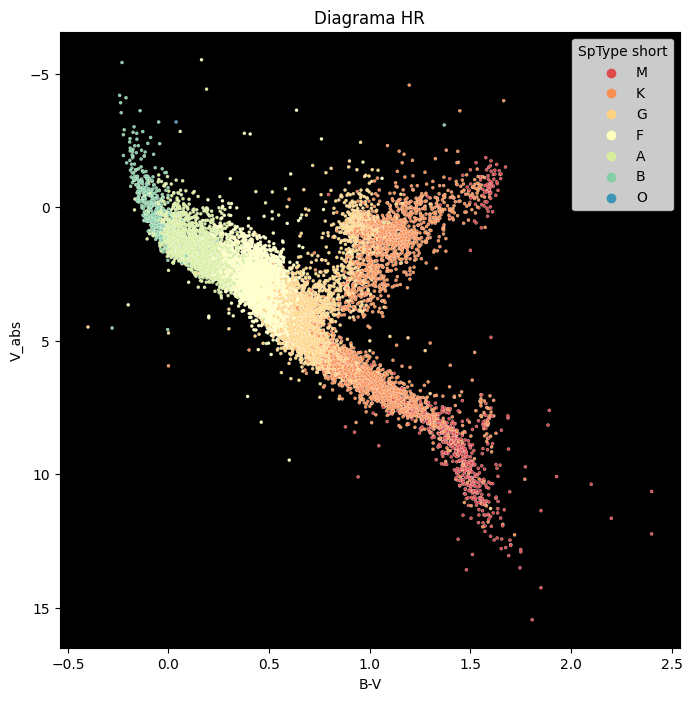

In [28]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df, x='B-V', y='V_abs', hue='SpType short', hue_order=['M', 'K', 'G', 'F', 'A', 'B', 'O'], palette='Spectral', s=5)
ax.invert_yaxis()
ax.set_facecolor('black')
plt.title('Diagrama HR')
plt.show()



```
# 1. ¿Cuáles regiones del diagrama HR pueden identificarse claramente en la imagen? ¿Cuáles no se ven?
# 2. ¿Por qué es necesario invertir el eje y?
# 3. ¿Cómo se relaciona el tipo espectral (y el índice de color) con la temperatura?
# 4. ¿Aproximadamente qué indice de color tiene el Sol? Justificar.
```



#### Cantidad de estrellas de cada tipo espectral

In [33]:
dict_sptype = dict(df['SpType short'].value_counts())
sptype_keys = list(dict_sptype.keys())
sptype_count = list(dict_sptype.values())

In [34]:
sptype_keys

['F', 'G', 'K', 'A', 'M', 'B', 'O']

In [30]:
sptype_count

[5650, 5078, 3441, 2224, 609, 407, 2]

In [35]:
dict_sptype

{'F': 5650, 'G': 5078, 'K': 3441, 'A': 2224, 'M': 609, 'B': 407, 'O': 2}

In [36]:
df_sptype = pd.DataFrame({'SpType':sptype_keys, 'SpType_count':sptype_count})

In [37]:
df_sptype

,SpType,SpType_count
0,F,5650
1,G,5078
2,K,3441
3,A,2224
4,M,609
5,B,407
6,O,2


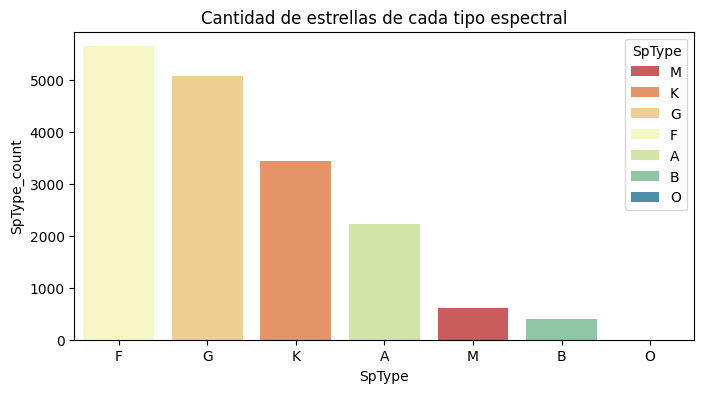

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_sptype, x='SpType', y='SpType_count', hue='SpType', hue_order=['M', 'K', 'G', 'F', 'A', 'B', 'O'], palette='Spectral', dodge=False)
plt.title('Cantidad de estrellas de cada tipo espectral')
plt.show()



```
# ¿Por qué hay pocas estrellas O y B?
# ¿Por qué hay pocas estrellas M?
```



### **Predicción del tipo espectral**

#### Construcción del modelo

In [39]:
%%capture
pip install sklearn

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X = df[['B-V', 'V_abs']]
y = df['SpType']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
X_test_copy = X_test.copy()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i*5)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Error medio según valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Error medio')
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=45)
classifier.fit(X_train, y_train)

#### Evaluación del modelo

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
df_comparacion = pd.DataFrame({'B-V':X_test_copy['B-V'], 'V_abs':X_test_copy['V_abs'], 'True_SpType':y_test, 'Predicted_SpType':y_pred})

In [ ]:
df_errores = df_comparacion[df_comparacion['True_SpType']!=df_comparacion['Predicted_SpType']]

In [ ]:
df_errores.sample(5)

In [ ]:
porcentaje_error = (len(df_errores)/len(df_comparacion))*100

In [ ]:
print(f'El {porcentaje_error: .0f}% de las estrellas fueron mal clasificadas usando este modelo.')

In [ ]:
color = ['k']

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='B-V', y='V_abs', hue='SpType', hue_order=['M', 'K', 'G', 'F', 'A', 'B', 'O'], palette='Spectral', s=6, ax=ax)
sns.scatterplot(data=df_errores, x='B-V', y='V_abs', color='blue', marker='D', s=7, ax=ax)
ax.invert_yaxis()
ax.set_facecolor('black')
plt.title('Ubicación en el diagrama H-R de las estrellas mal clasificadas')
plt.show()

In [ ]:
tipos_espectrales = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

n_anterior = 0  # Cantidad de veces que se predice un tipo anterior al real
n_posterior = 0   # Cantidad de veces que se predice un tipo posterior al real

for i in range(len(df_errores)):
  sp_type_pred = list(df_errores['Predicted_SpType'])[i]
  sp_type_pred_index = tipos_espectrales.index(sp_type_pred)
  sp_type_real = list(df_errores['True_SpType'])[i]
  sp_type_real_index = tipos_espectrales.index(sp_type_real)
  if sp_type_pred_index==0:
    if sp_type_real_index==sp_type_pred_index+1:
      n_anterior += 1
  elif sp_type_pred_index==len(tipos_espectrales)-1:
    if sp_type_real_index==sp_type_pred_index-1:
      n_posterior += 1
  else:
    if sp_type_real_index==sp_type_pred_index-1:
      n_posterior += 1
    elif sp_type_real_index==sp_type_pred_index+1:
      n_anterior += 1

In [ ]:
print(f'El {(n_anterior*100)/len(df_errores): .1f}% de las veces se predijo un tipo espectral un lugar "anterior" (hacia temperaturas mayores) al real.')
print(f'El {(n_posterior*100)/len(df_errores): .1f}% de las veces se predijo un tipo espectral un lugar "posterior" (hacia temperaturas menores) al real.')
print(f'El {((len(df_errores)-n_anterior-n_posterior)*100)/len(df_errores): .1f}% de las veces se predijo un tipo espectral no adyacente al real.')